## Predicting the players subscription pattern uning KNN Classification Model.

**Group Member**
1. Jenny Gao 
2. Sai Sriman
3. Maya Kosciolek
4.

#### Introduction

In the recent times the gaming companies and researchers have become increasingly intrested in understanding the behaviour of player based on how the players intreacts in the virtual enviornments.Analysing the interactions helps them to optimise their enviornment to better suit the player's intrests.At UBC, a research group led by Dr.Frank Wood collected players data from a custom Minecraft enviornment as to which players are engaged more to the game and how much time they spend and what is there age.One improtant factor of engagement is whether a player subscribes to the game related newsletter or not. 

In this project, we focus on one broad question `What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?` for our analysis.

For this anlysis we are going to use the `players` dataset.This dataset contains data of each player the amount of time spent playing the game , their age and a unique hasded email code etc. For this analysis we are going to use `Age` and the `Played_hours` columns as our exploratory/predictor variable. And the variable of intreset is the Subscribed Column which contains a boolean value of True / False depending upon whether the player subscribes to the Newsletter or not.


In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The data set `players` can be viewed below:

In [2]:
players_data <- read_csv("players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


The dataset was then wrangled to only include columns that are relevant to our question (Age, subscribe and played_hours).

In [3]:
players <- players_data |>
    summarize(subscribe, Age, played_hours)
players

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


subscribe,Age,played_hours
<lgl>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
TRUE,21,0.1
TRUE,17,0.0
TRUE,19,0.0
FALSE,21,0.0
TRUE,47,0.1


In [4]:
players |> count(subscribe)

subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


- Most players are subscribed. A total of 144 out of 196. This means the target variable is unbalanced, since there are more subscribers than non-subscribers.

In [5]:
players |>
 summarize(
    avg_age = round(mean(Age, na.rm = TRUE), 2),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    avg_played = round(mean(played_hours, na.rm = TRUE), 2),
    min_played = min(played_hours, na.rm = TRUE),
    max_played = max(played_hours, na.rm = TRUE)
  )

avg_age,min_age,max_age,avg_played,min_played,max_played
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,9,58,5.85,0,223.1


- The summarized results show that players are fairly young overall, with an average age of about 21.14 years and ages ranging from 9 to 58.
- Playtime varies widely: the average number of hours played is 5.85, but some players have not played at all (0 hours) while others have played up to 223.1 hours, indicating a large difference in engagement.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


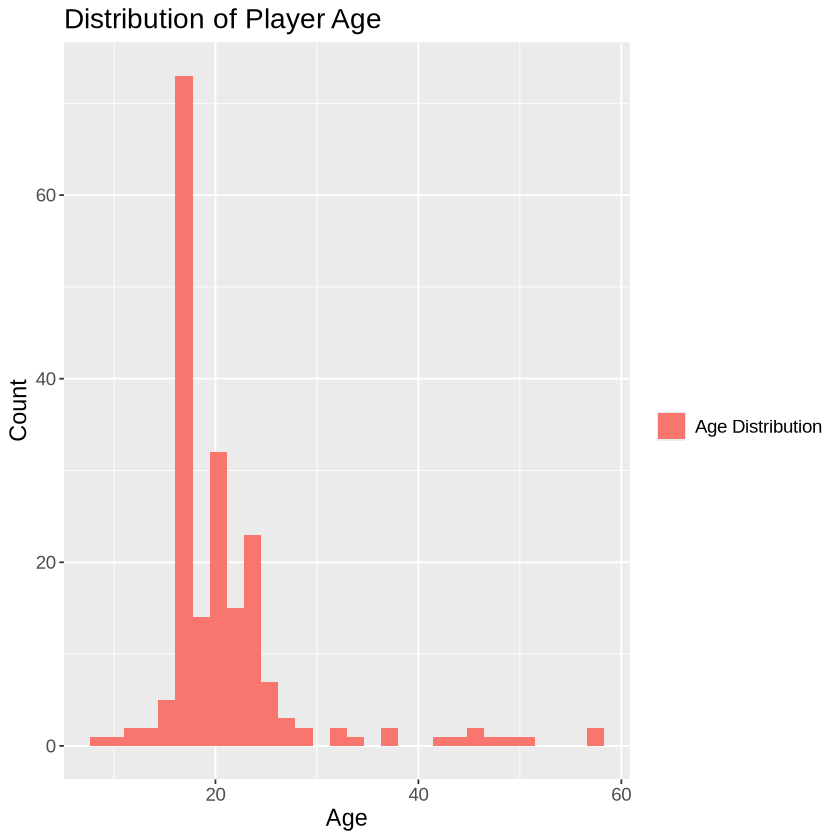

In [6]:
players |>
  ggplot(aes(x = Age, fill = "Age Distribution")) +
  geom_histogram(bins = 30, alpha = 1) +
  labs(
    title = "Distribution of Player Age",
    x = "Age",
    y = "Count",
    fill = ""
  )+
  theme(text = element_text(size = 14))

- The above histogram shows that most players are between 15 and 25 years old, with fewer older players. The distribution is slightly skewed, more users on the younger age range. We did get a warning message that two non-finite entries were removed. Overall this suggests the game mainly attracts younger users.

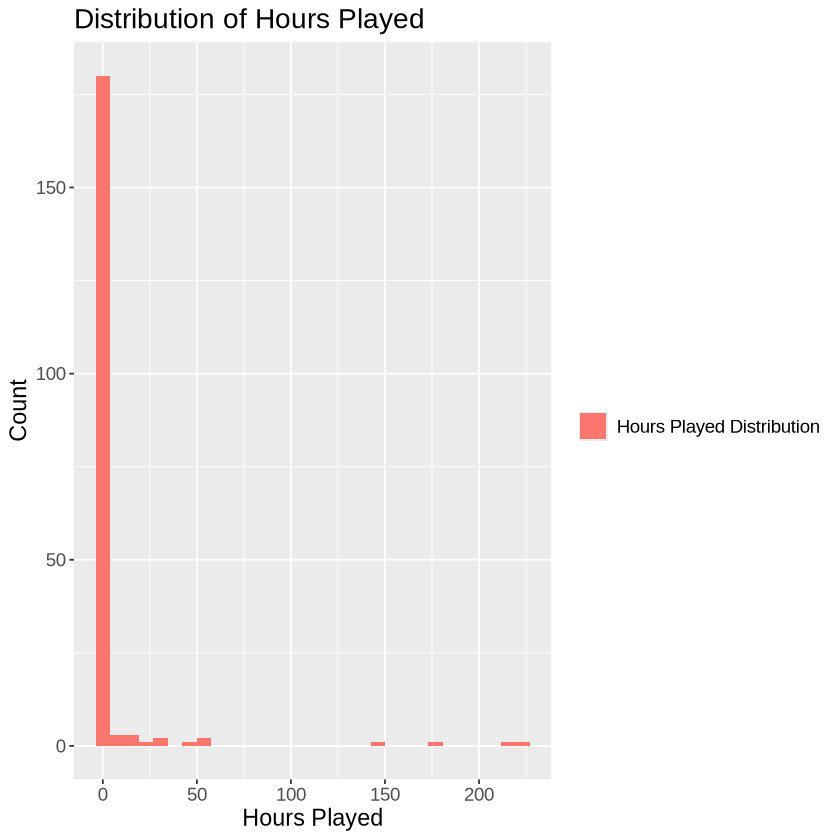

In [7]:
players |>
  ggplot(aes(x = played_hours, fill = "Hours Played Distribution")) +
  geom_histogram(bins = 30, alpha = 1) +
  labs(
    title = "Distribution of Hours Played",
    x = "Hours Played",
    y = "Count",
    fill = ""
  )+
  theme(text = element_text(size = 14))

- The histogram of the distribution of hours played showed that most of the players have low play times. There is only a few extreme outliers who played far more hours, more than 200. The distribution is skewed, with more cluster on the left, only a small number of players at the upper end of the range.

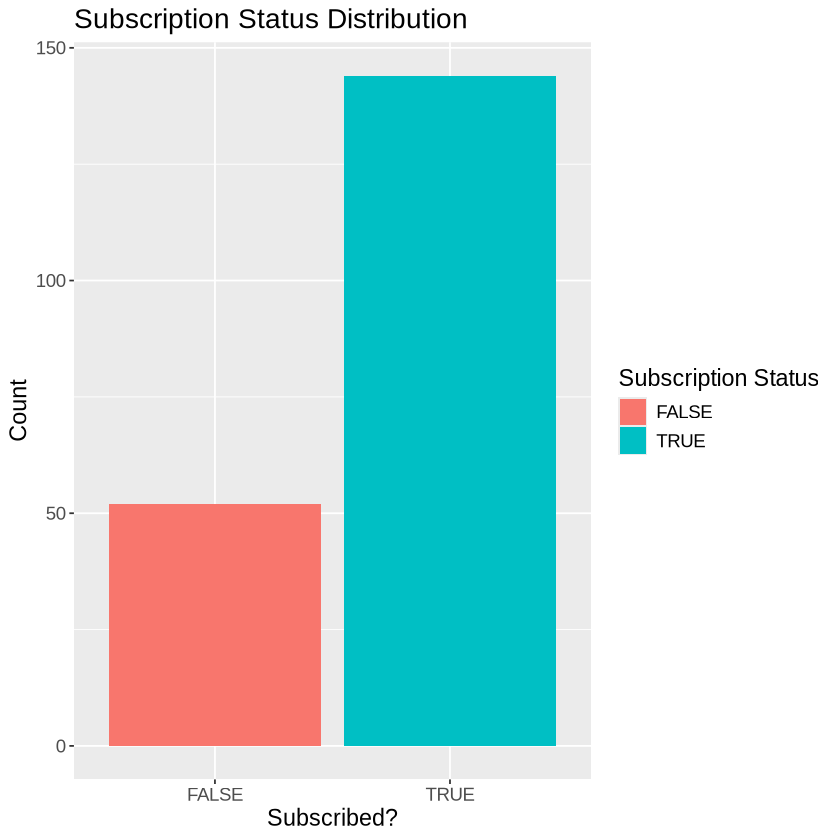

In [8]:
players |>
  ggplot(aes(x = subscribe, fill = factor(subscribe))) +
  geom_bar() +
  labs(
    title = "Subscription Status Distribution",
    x = "Subscribed?",
    y = "Count",
    fill = "Subscription Status"
  ) +
theme(text = element_text(size = 14))

- The bar chart above shows that far more users are subscribed than not subscribed. The TRUE bar is much higher, indicating more people subscribed. Also from the count subscribe table earlier, a total of 144 out of 196 person subscribed.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


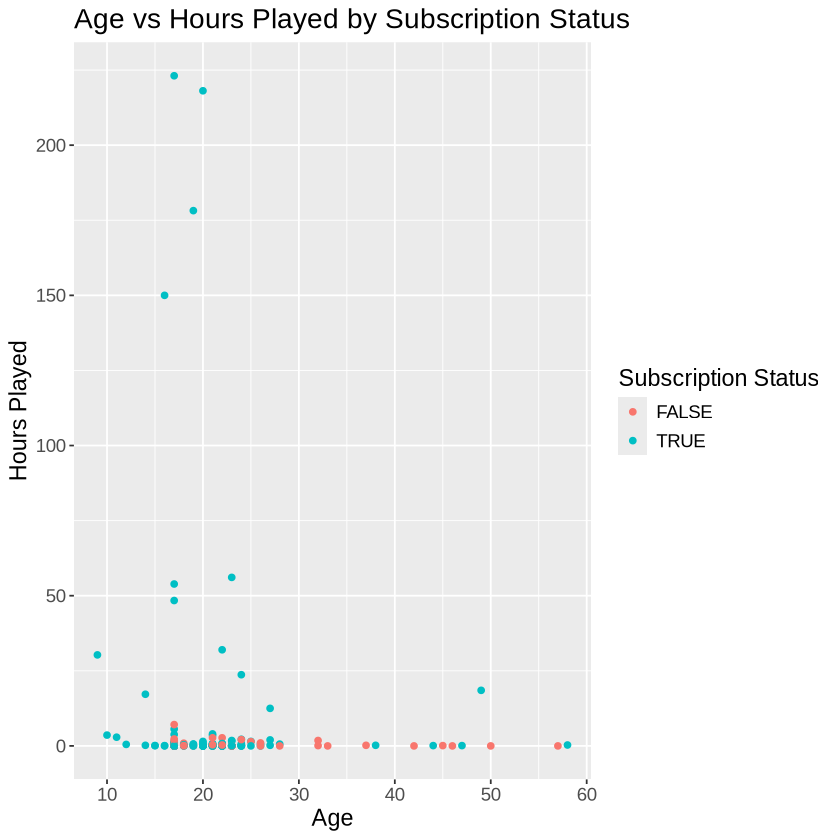

In [9]:
players |>
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point() +
  labs(
    title = "Age vs Hours Played by Subscription Status",
    x = "Age",
    y = "Hours Played",
    color = "Subscription Status"
  )+
 theme(text = element_text(size = 14))

- The scatterplot shows the relationship between age and hours played, separated by subscription status. We can see that younger players, like teenagers tend to play the most hours, while older players play very little hours. Subscribed players generally appear in the higher-hours area, suggesting subscription may be linked to heavier play time. 

In [10]:
players_data_cleaned<-players_data|>
        drop_na(Age, played_hours, subscribe) |>
          mutate(subscribe = as_factor(subscribe))

In [11]:
players_data_cleaned

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Now that the data has been explored using visualizations and summarized results, the model is built and we set the seed so the results are reproducible.
- The dataset is split into a training set and a testing set to see how well the model runs on data it hasn't seen before
- A recipe and model is created to fit to the training set, and run cross validation to see which K value has the most accuracy
- The K value with the highest accuracy is the K value we use for the model

In [12]:
set.seed(1234)
players_split<-initial_split(players_data_cleaned,prop=0.75,strata=subscribe)
training_data<-training(players_split)
testing_data<-testing(players_split)
training_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
Veteran,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
Veteran,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18
Veteran,FALSE,88247d9a46fc214a12485dcbcbb03a8ddebfe8c1ec5fe209cd660147625c8e62,1.4,Aiden,Prefer not to say,25
Beginner,FALSE,fa7d496b2f74c51ec70395bd8397b49f97a3ce8d7ba7e08887d82ec0008137a7,0.0,Umar,Male,24
Beginner,FALSE,5e5c25a773be7a62638a163d773534e575a5ad5782104723e53cb676a30fa60b,0.0,Jude,Female,42
Beginner,FALSE,1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,0.2,Aurora,Female,37


In [13]:
testing_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Veteran,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17
Regular,TRUE,bc704ff2bc676dbf48ee41b9e11481c1387bf758ad318f2428f336e3fecc6660,0.3,Andy,Male,58
Amateur,FALSE,df6a1201c9c638aff1df8aeaf459a5b0a00aa04824936ee0305f5c275352c647,0.0,Vasco,Prefer not to say,33
Veteran,TRUE,d782933acd14c834e53dea816005a3583cb87710f7347a7a862cb4a43cc21692,0.0,Ishaan,Male,17


In [14]:
players_recipe<-recipe(subscribe ~ Age +played_hours,data = training_data) |>
            step_center(all_predictors()) |>
            step_scale(all_predictors())

players_spec<-nearest_neighbor(weight_func="rectangular",neighbors=5) |>
        set_engine("kknn")|>
        set_mode("classification")


players_fit<-workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)|>
    fit(data=training_data)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3724138
Best kernel: rectangular
Best k: 5

In [15]:
players_test_predictions<-predict(players_fit,testing_data) |>
                bind_cols(testing_data)

In [16]:
players_predictions_accuracy<-players_test_predictions|>
            metrics(truth=subscribe,estimate = .pred_class)
players_predictions_accuracy
players_mat<-conf_mat(players_test_predictions,truth=subscribe,estimate=.pred_class)
players_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6326531
kap,binary,0.1787709


          Truth
Prediction FALSE TRUE
     FALSE     7   12
     TRUE      6   24

In [17]:
set.seed(123)
players_vfold<-vfold_cv(training_data,v=5,strata=subscribe)

In [18]:
players_resample_fit <- workflow() |>
                      add_recipe(players_recipe) |>
                      add_model(players_spec) |>
                      fit_resamples(resamples = players_vfold)

In [19]:
player_metrics<-players_resample_fit|>
                collect_metrics()
player_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.5721839,5,0.03597977,Preprocessor1_Model1
roc_auc,binary,0.5035250,5,0.06464261,Preprocessor1_Model1


In [20]:
players_spec_tuned<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
    set_engine("kknn")|>
    set_mode("classification")
players_spec_tuned

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [21]:
set.seed(123)

k_vals<-tibble(neighbors=seq(from=1,to=20,by=1))

In [22]:
set.seed(123)
player_knn_results<-workflow() |>
               add_recipe(players_recipe) |>
               add_model(players_spec_tuned) |>
               tune_grid(resamples = players_vfold, grid = k_vals) |>
               collect_metrics()
player_knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4608210,5,0.05333534,Preprocessor1_Model01
1,roc_auc,binary,0.4986472,5,0.06561730,Preprocessor1_Model01
2,accuracy,binary,0.4470115,5,0.05934820,Preprocessor1_Model02
2,roc_auc,binary,0.4824018,5,0.05559924,Preprocessor1_Model02
3,accuracy,binary,0.5510016,5,0.04009305,Preprocessor1_Model03
3,roc_auc,binary,0.5229321,5,0.05661044,Preprocessor1_Model03
4,accuracy,binary,0.5295731,5,0.05604085,Preprocessor1_Model04
4,roc_auc,binary,0.5196506,5,0.06055715,Preprocessor1_Model04
5,accuracy,binary,0.5721839,5,0.03597977,Preprocessor1_Model05


In [23]:
best_k<-player_knn_results|>
        filter(.metric == "accuracy")|>
        arrange(desc(mean))|>
        slice(1)

In [24]:
best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
18,accuracy,binary,0.7585222,5,0.01553123,Preprocessor1_Model18


In [25]:
final_spec_tuned<-nearest_neighbor(weight_func="rectangular",neighbors= 18)|>
                                set_engine("kknn") |>
                                set_mode("classification")

In [26]:
final_knn_fit<-workflow()|>
            add_recipe(players_recipe)|>
            add_model(final_spec_tuned)|>
            fit(data=training_data)

In [27]:
final_predictions<-predict(final_knn_fit,testing_data) |>
                bind_cols(testing_data)

In [28]:
final_pred_metrics<-metrics(final_predictions,truth=subscribe,estimate = .pred_class)
final_pred_metrics
final_pred_conf_mat<-conf_mat(final_predictions,truth=subscribe,estimate=.pred_class)
final_pred_conf_mat
final_pred_recall<-recall(final_predictions,truth=subscribe,estimate = .pred_class,event_level="second")
final_pred_recall
final_pred_precision<-precision(final_predictions,truth=subscribe,estimate = .pred_class,event_level="second")
final_pred_precision

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6734694
kap,binary,-0.1104816


          Truth
Prediction FALSE TRUE
     FALSE     0    3
     TRUE     13   33

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9166667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7173913


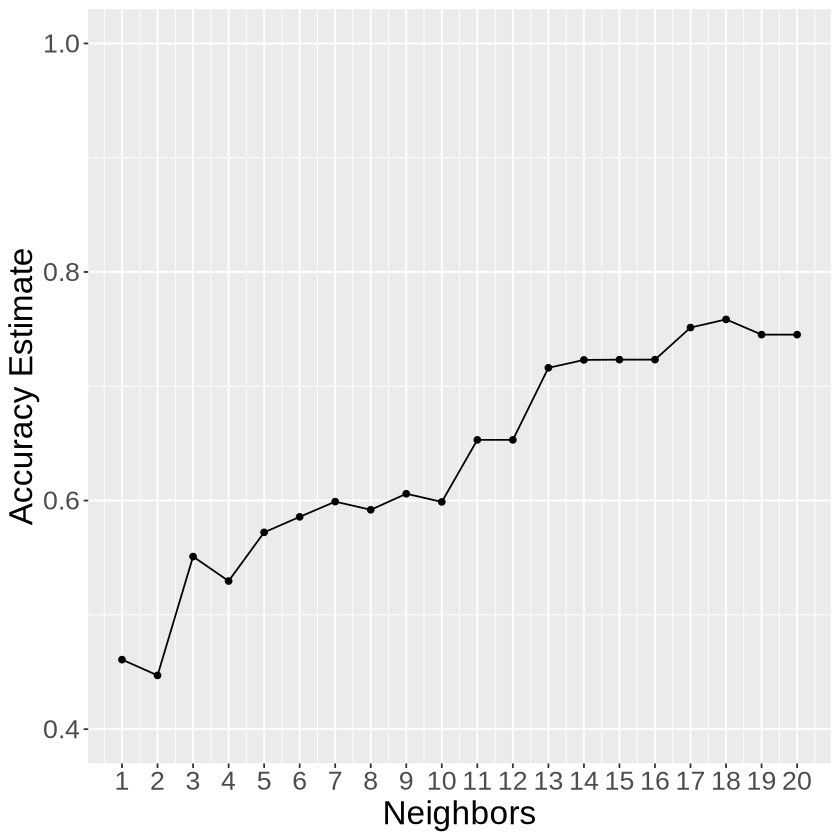

In [29]:
accuracies <- player_knn_results|>
        filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                     geom_point() +
                     geom_line() +
                     labs(x = "Neighbors", y = "Accuracy Estimate") +
                     theme(text = element_text(size = 20)) +
                     scale_x_continuous(breaks = seq(0, 20, by = 1)) +
                     scale_y_continuous(limits = c(0.4, 1.0))
### END SOLUTION
accuracy_versus_k

Best neighbour: 18
Accuracy: 67%
Percision: 72%
Recall: 91%

**Discussion**
- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to

#### References
 Refered to knn worksheets and tutorials for the process.